In [112]:
import bbknn
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [44]:
adata = sc.read_h5ad('/lustre/scratch127/cellgen/cellgeni/tmp/scvi_integrated_d43larry_refSKO_04Nov2025.h5ad')
del adata.obsp['connectivities']
del adata.obsp['distances']
adata

AnnData object with n_obs × n_vars = 153691 × 2000
    obs: 'barcodes', 'sanger_id', 'Clone', 'Barcode', 'Barcode_n', 'sing_or_mult', 'batch', '_is_larry', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'pct_counts_in_top_20_genes', 'sanger_ID', 'outlier', 'outlier_pct_ribo', 'QC', 'unint_leiden_res_0.02', 'unint_leiden_res_0.50', 'unint_leiden_res_1.00', 'unint_leiden_res_2.00', 'unint_leiden_res_2.50', 'unint_leiden_res_3.00', 'Clone_id', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'annot0_manual', 'Batch', 'Clone_id_seq', 'sample_ID', 'sanger_study_ID', 'haniffa_lab_project', 'technology', 'modality', 'cell_or_nuclei', 'technical_r

In [45]:
bbknn.bbknn(adata,use_rep='X_scVI',batch_key='batch',neighbors_within_batch=50)
adata

AnnData object with n_obs × n_vars = 153691 × 2000
    obs: 'barcodes', 'sanger_id', 'Clone', 'Barcode', 'Barcode_n', 'sing_or_mult', 'batch', '_is_larry', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'doublet_scores', 'predicted_doublets', 'pct_counts_in_top_20_genes', 'sanger_ID', 'outlier', 'outlier_pct_ribo', 'QC', 'unint_leiden_res_0.02', 'unint_leiden_res_0.50', 'unint_leiden_res_1.00', 'unint_leiden_res_2.00', 'unint_leiden_res_2.50', 'unint_leiden_res_3.00', 'Clone_id', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'annot0_manual', 'Batch', 'Clone_id_seq', 'sample_ID', 'sanger_study_ID', 'haniffa_lab_project', 'technology', 'modality', 'cell_or_nuclei', 'technical_r

In [106]:
def annotateByKnn(data,knn_key,ann_key,agg_fun):
    knn = data.obsp[knn_key]
    res = []
    for row in range(data.shape[0]):
        inxs = knn.indices[knn.indptr[row]:knn.indptr[row+1]]
        inxs = [i for i in inxs if  i != row]
        r = data.obs[ann_key][inxs]
        res.append(agg_fun(r))
    res=pd.DataFrame(res)
    res.index = data.obs_names
    return res

def agg_mean(x):
    return [x.mean(),(~x.isna()).sum()]

In [79]:
adata.obs['age_years_ref'] = adata.obs.age_years.copy()
adata.obs['age_years_ref'] = adata.obs['age_years_ref'].astype(str).astype(float)
adata.obs['age_years_ref'][adata.obs.batch=='larry'] = pd.NA
adata.obs['age_years_ref'].value_counts(dropna=False)

/tmp/ipykernel_1515444/4121144864.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.obs['age_years_ref'][adata.obs.batch=='larry'] = pd.NA
/tmp/ipykernel_1515444/4121144864.py:3: SettingWithCopyWarning: 
A value is trying to be set o

age_years_ref
112.0    26200
96.0     19880
133.0    19670
131.0    19639
70.0     18396
29.0     15184
83.0     12820
NaN      10657
50.0      7100
14.0      4145
Name: count, dtype: int64

In [81]:
adata.obs['age_years_ref']

AAACCCACACTGTCGG-7785STDY16123305-d43-8-d43-larry      NaN
AAACGCTGTGAGGAAA-7785STDY16123305-d43-8-d43-larry      NaN
AAAGAACGTCAAACGG-7785STDY16123305-d43-8-d43-larry      NaN
AAAGAACGTCACCTTC-7785STDY16123305-d43-8-d43-larry      NaN
AAAGAACTCAGGAAAT-7785STDY16123305-d43-8-d43-larry      NaN
                                                     ...  
CTATAGGCACGATAGG-1-HCA_SkO13801444-13-ref            133.0
GACCCAGGTGAGTGAC-1-HCA_SkO13801444-13-ref            133.0
CTGCCTATCAAATAGG-1-HCA_SkO13801444-13-ref            133.0
GATGAGGAGGTAACTA-1-HCA_SkO13801444-13-ref            133.0
TACCTCGAGGACAAGA-1-HCA_SkO13801444-13-ref            133.0
Name: age_years_ref, Length: 153691, dtype: float64

In [97]:
(~adata.obs.age_years_ref.isna()).sum()

np.int64(143034)

In [108]:
pred_age = annotateByKnn(adata,knn_key = 'distances',ann_key = 'age_years_ref',agg_fun=agg_mean)
pred_age

/tmp/ipykernel_1515444/2826190185.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  r = data.obs[ann_key][inxs]


,0,1
AAACCCACACTGTCGG-7785STDY16123305-d43-8-d43-larry,90.240000,50
AAACGCTGTGAGGAAA-7785STDY16123305-d43-8-d43-larry,75.740000,50
AAAGAACGTCAAACGG-7785STDY16123305-d43-8-d43-larry,90.620000,50
AAAGAACGTCACCTTC-7785STDY16123305-d43-8-d43-larry,91.740000,50
AAAGAACTCAGGAAAT-7785STDY16123305-d43-8-d43-larry,90.680000,50
...,...,...
CTATAGGCACGATAGG-1-HCA_SkO13801444-13-ref,128.510204,49
GACCCAGGTGAGTGAC-1-HCA_SkO13801444-13-ref,113.857143,49
CTGCCTATCAAATAGG-1-HCA_SkO13801444-13-ref,97.204082,49
GATGAGGAGGTAACTA-1-HCA_SkO13801444-13-ref,111.204082,49


In [122]:
adata.obs['pred_age'] = pred_age[0]
adata.obs['pred_age'] 

AAACCCACACTGTCGG-7785STDY16123305-d43-8-d43-larry     90.240000
AAACGCTGTGAGGAAA-7785STDY16123305-d43-8-d43-larry     75.740000
AAAGAACGTCAAACGG-7785STDY16123305-d43-8-d43-larry     90.620000
AAAGAACGTCACCTTC-7785STDY16123305-d43-8-d43-larry     91.740000
AAAGAACTCAGGAAAT-7785STDY16123305-d43-8-d43-larry     90.680000
                                                        ...    
CTATAGGCACGATAGG-1-HCA_SkO13801444-13-ref            128.510204
GACCCAGGTGAGTGAC-1-HCA_SkO13801444-13-ref            113.857143
CTGCCTATCAAATAGG-1-HCA_SkO13801444-13-ref             97.204082
GATGAGGAGGTAACTA-1-HCA_SkO13801444-13-ref            111.204082
TACCTCGAGGACAAGA-1-HCA_SkO13801444-13-ref            115.714286
Name: pred_age, Length: 153691, dtype: float64

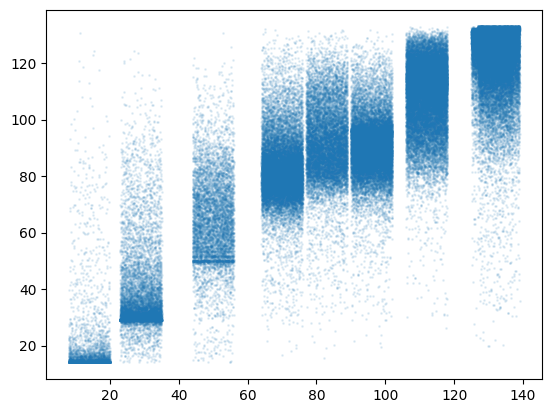

In [120]:
# check how prediction works for reference (where we know the truth)
x_jittered = adata.obs.age_years_ref + np.random.uniform(-6, 6, size=adata.shape[0])

plt.scatter(x_jittered,pred_age[0],s=1, alpha=0.1)

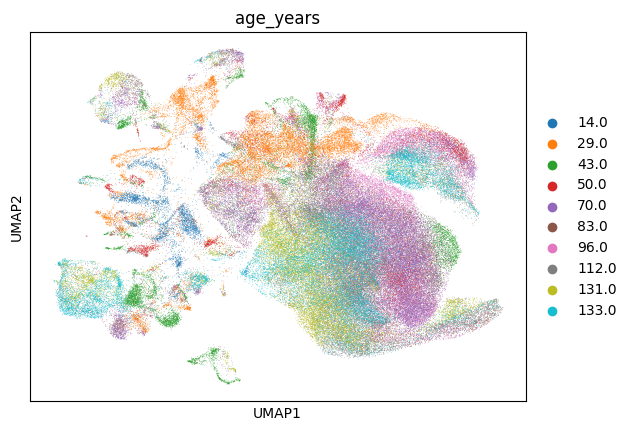

In [121]:
sc.pl.umap(adata,color=['age_years'])

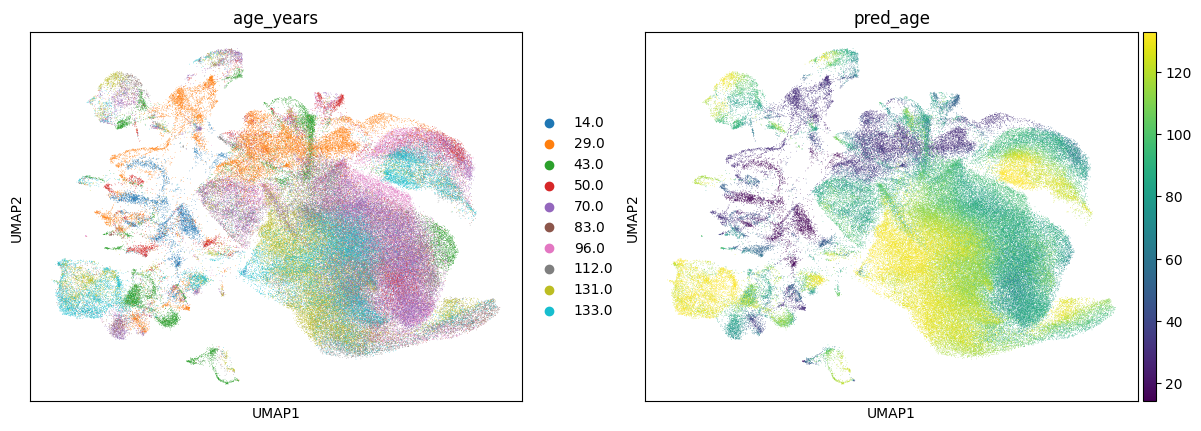

In [123]:
sc.pl.umap(adata,color=['age_years','pred_age'])

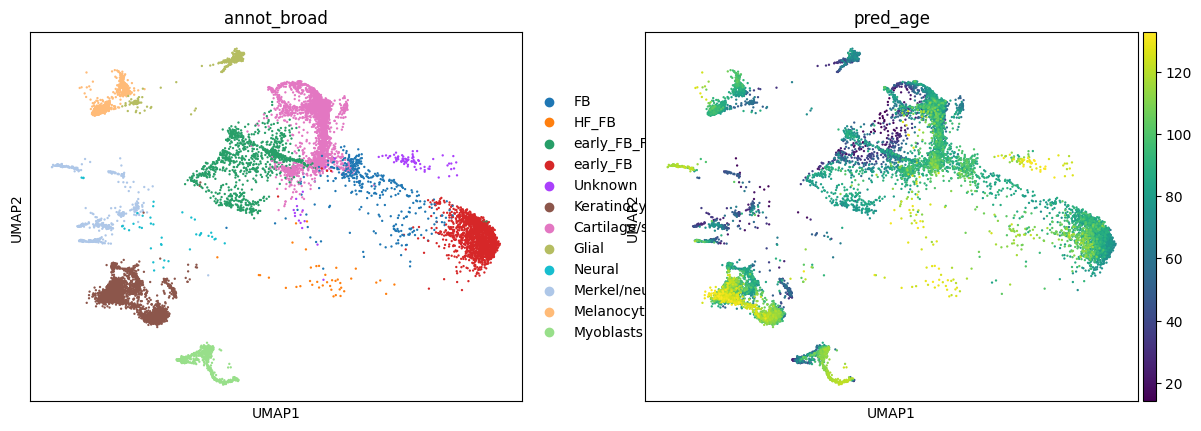

In [126]:
sc.pl.umap(adata[adata.obs.batch=='larry'],color=['annot_broad','pred_age'])

/tmp/ipykernel_1515444/3942552969.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = adata.obs[adata.obs.batch=='larry'].groupby('annot_broad')['pred_age'].apply(list)
/tmp/ipykernel_1515444/3942552969.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  z=plt.boxplot(groups, labels=groups.index)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, 'FB'),
  Text(2, 0, 'HF_FB'),
  Text(3, 0, 'early_FB_FRZB'),
  Text(4, 0, 'early_FB'),
  Text(5, 0, 'Unknown'),
  Text(6, 0, 'Keratinocyte'),
  Text(7, 0, 'Cartilage/smooth_muscle'),
  Text(8, 0, 'Glial'),
  Text(9, 0, 'Neural'),
  Text(10, 0, 'Merkel/neural'),
  Text(11, 0, 'Melanocyte'),
  Text(12, 0, 'Myoblasts')])

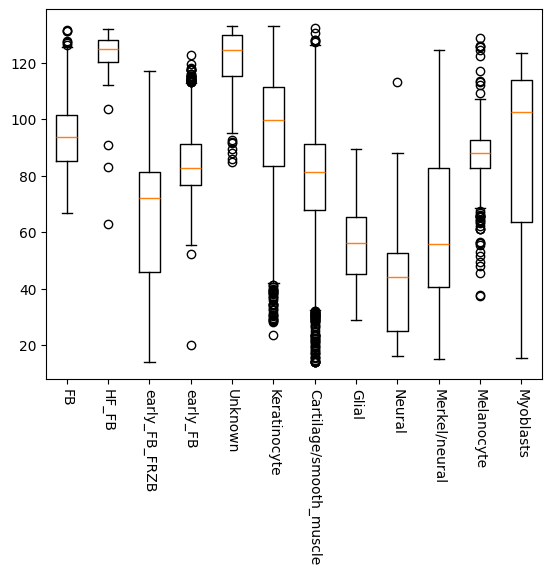

In [130]:
groups = adata.obs[adata.obs.batch=='larry'].groupby('annot_broad')['pred_age'].apply(list)

z=plt.boxplot(groups, labels=groups.index)
plt.xticks(rotation=-90)